In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import time

print("Tensorflow version: "+tf.__version__)

Tensorflow version: 2.2.0-rc2


In [0]:
attributes = pd.read_csv("OceanProximityPreparedCleanAttributes.csv")
label = pd.read_csv("OceanProximityOneHotEncodedClasses.csv")

In [0]:
TRAIN_RATIO = 0.8
VAL_RATIO=0.1
TEST_RATIO=0.1

n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATIO)
n_val = int(n_instances*VAL_RATIO)
n_test = int(n_instances*TEST_RATIO)

x_train = attributes.values[:n_train]
y_train = label.values[:n_train]
x_val =   attributes.values[n_train:n_train + n_val]
y_val =   label.values[n_train:n_train + n_val]
x_test =   attributes.values[(n_train + n_val):(n_train + n_val + n_test)]
y_test =   label.values[(n_train + n_val):(n_train + n_val + n_test)]

INPUTS =  x_train.shape[1]
OUTPUTS = y_train.shape[1]

NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_VAL_EXAMPLES =      int(round(x_val.shape[0]/1))
NUM_TEST_EXAMPLES =     int(round(x_test.shape[0]/1))

In [0]:
model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))

model.add(keras.layers.Dense(1400))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1000))
model.add(keras.layers.Activation("relu"))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(150))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(100))
model.add(keras.layers.Activation("relu"))

model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=0.1),
              metrics=["categorical_accuracy"])

In [5]:
history = model.fit(x_train, y_train, 
                    batch_size = 32, 
                    epochs=500, 
                    verbose = 1, 
                    validation_data = (x_val, y_val))

Epoch 1/500
511/511 [==============================] - 10s 19ms/step - loss: 0.7729 - categorical_accuracy: 0.7009 - val_loss: 0.6476 - val_categorical_accuracy: 0.7365
Epoch 2/500
511/511 [==============================] - 10s 19ms/step - loss: 0.5890 - categorical_accuracy: 0.7621 - val_loss: 0.5139 - val_categorical_accuracy: 0.7929
Epoch 3/500
511/511 [==============================] - 10s 19ms/step - loss: 0.4941 - categorical_accuracy: 0.7976 - val_loss: 0.4379 - val_categorical_accuracy: 0.8213
Epoch 4/500
511/511 [==============================] - 10s 19ms/step - loss: 0.4501 - categorical_accuracy: 0.8236 - val_loss: 0.3985 - val_categorical_accuracy: 0.8384
Epoch 5/500
511/511 [==============================] - 10s 19ms/step - loss: 0.4109 - categorical_accuracy: 0.8338 - val_loss: 0.3407 - val_categorical_accuracy: 0.8609
Epoch 6/500
511/511 [==============================] - 10s 19ms/step - loss: 0.3793 - categorical_accuracy: 0.8462 - val_loss: 0.3938 - val_categorical_acc

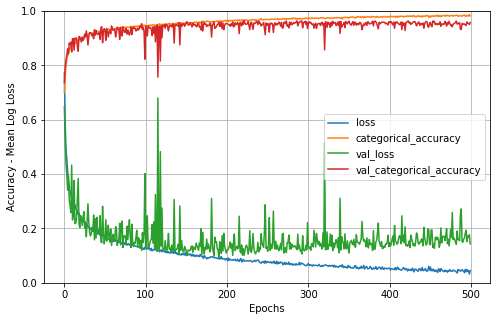

In [6]:
results = pd.DataFrame(history.history)
results.plot(figsize = (8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0,1]
plt.show()

In [7]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

64/64 [==============================] - 0s 4ms/step - loss: 0.1613 - categorical_accuracy: 0.9628
Test loss: 0.16133853793144226 - Accuracy: 0.9627816081047058
